In [1]:
energy = 0.9
pressure= .004
radius = 3
tempSpike = 100

In [2]:
# do r6 kt 14 and r3 kt 14
import numpy as np
import hoomd
import fresnel
import matplotlib.pyplot as plt
import scipy
import h5py
import gsd.hoomd
import itertools
import math
import time
import os
import matplotlib

%matplotlib inline
matplotlib.style.use('ggplot')
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

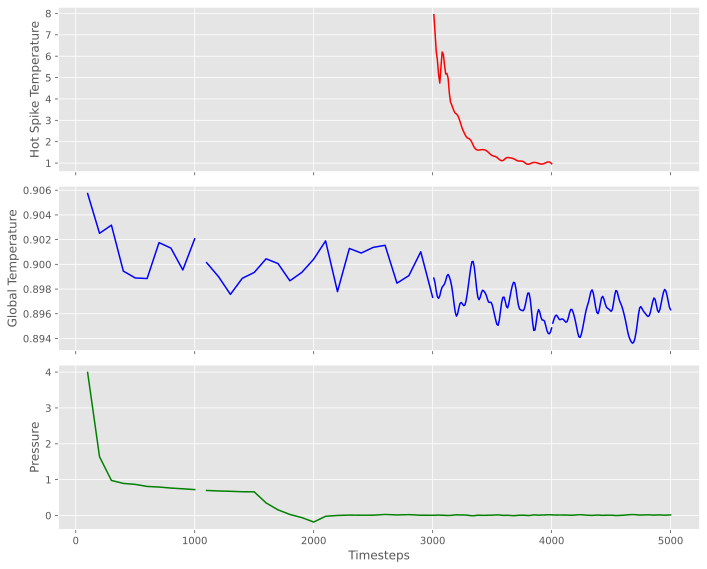

In [8]:
# r2 kt 8
radius = 2
kt = 8 
energy = 0.9
target_pressure = .004

hdf5_file_stable = h5py.File(name='logStableLiquidenergy'+str(energy)+'.h5', mode='r')
timesteps_stable = np.float64(hdf5_file_stable['hoomd-data/Simulation/timestep'][:])
pressure_data_stable = np.float64(hdf5_file_stable['hoomd-data/md/compute/ThermodynamicQuantities/pressure'][:])
temperature_data_stable = np.float64(hdf5_file_stable['hoomd-data/md/compute/ThermodynamicQuantities/kinetic_temperature'][:])

hdf5_file_drop_pressure = h5py.File(name='logpressure'+str(target_pressure)+'energy'+str(energy)+'.h5', mode='r')
timesteps_drop_pressure = np.float64(hdf5_file_drop_pressure['hoomd-data/Simulation/timestep'][:])
temperature_data_drop_pressure = np.float64(hdf5_file_drop_pressure['hoomd-data/md/compute/ThermodynamicQuantities/kinetic_temperature'][:])
pressure_data_drop_pressure = np.float64(hdf5_file_drop_pressure['hoomd-data/md/compute/ThermodynamicQuantities/pressure'][:])

hdf5_file = h5py.File(name='r'+str(radius)+'kt'+str(kt)+'/heatSpike'+str(kt)+'energy'+str(energy)+'r'+str(radius)+'.h5', mode='r')
timesteps_spike = np.float64(hdf5_file['hoomd-data/Simulation/timestep'][:])
pressure_data_spike = np.float64(hdf5_file['hoomd-data/md/compute/ThermodynamicQuantities/pressure'][:])
temperature_data_spike = np.float64(hdf5_file['hoomd-data/md/compute/ThermodynamicQuantities/kinetic_temperature'][:])
temperature_data_only_heated = np.float64(hdf5_file['hoomd-data/md/compute/ThermodynamicQuantities_1/kinetic_temperature'][:])

hdf5_file_longer_run = h5py.File(name='r'+str(radius)+'kt'+str(kt)+'/longerRun'+str(kt)+'energy'+str(energy)+'r'+str(radius)+'.h5', mode='r')
timesteps_longer_run = np.float64(hdf5_file_longer_run['hoomd-data/Simulation/timestep'][:])
pressure_data_longer_run = np.float64(hdf5_file_longer_run['hoomd-data/md/compute/ThermodynamicQuantities/pressure'][:])
temperature_data_longer_run = np.float64(hdf5_file_longer_run['hoomd-data/md/compute/ThermodynamicQuantities/kinetic_temperature'][:])

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 8), sharex=True)

ax1.plot(timesteps_spike, temperature_data_only_heated, color='red')
ax1.set_ylabel('Hot Spike Temperature')

ax2.plot(timesteps_stable, temperature_data_stable, color='blue')
ax2.plot(timesteps_drop_pressure, temperature_data_drop_pressure, color='blue')
ax2.plot(timesteps_spike, temperature_data_spike, color='blue')
ax2.plot(timesteps_longer_run, (temperature_data_longer_run), color='blue')
ax2.set_ylabel('Global Temperature')

ax3.plot(timesteps_stable, (pressure_data_stable), color='green')
ax3.plot(timesteps_drop_pressure, (pressure_data_drop_pressure), color='green')
ax3.plot(timesteps_spike, (pressure_data_spike), color='green')  # Taking log of pressure_data_spike
ax3.plot(timesteps_longer_run,(pressure_data_longer_run), color='green')
ax3.set_ylabel('Pressure')
ax3.set_xlabel('Timesteps')

plt.tight_layout()
plt.show()


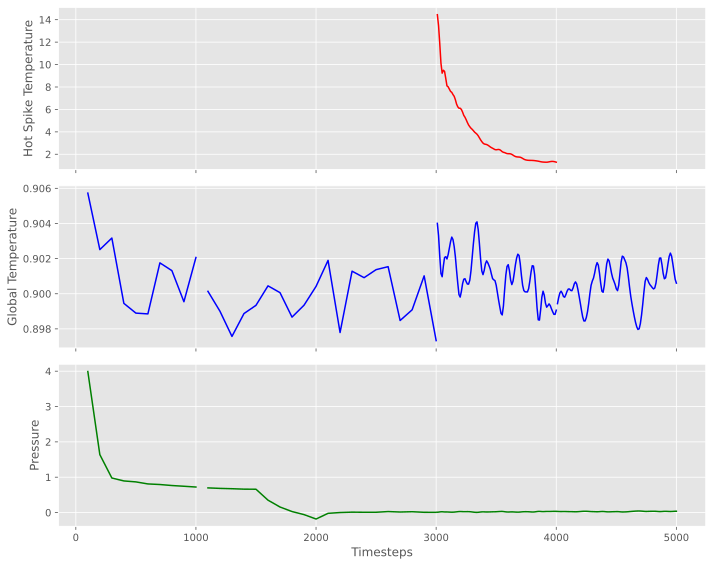

In [9]:
# r2 kt 8
radius = 3
kt = 14 
energy = 0.9
target_pressure = .004

hdf5_file_stable = h5py.File(name='logStableLiquidenergy'+str(energy)+'.h5', mode='r')
timesteps_stable = np.float64(hdf5_file_stable['hoomd-data/Simulation/timestep'][:])
pressure_data_stable = np.float64(hdf5_file_stable['hoomd-data/md/compute/ThermodynamicQuantities/pressure'][:])
temperature_data_stable = np.float64(hdf5_file_stable['hoomd-data/md/compute/ThermodynamicQuantities/kinetic_temperature'][:])

hdf5_file_drop_pressure = h5py.File(name='logpressure'+str(target_pressure)+'energy'+str(energy)+'.h5', mode='r')
timesteps_drop_pressure = np.float64(hdf5_file_drop_pressure['hoomd-data/Simulation/timestep'][:])
temperature_data_drop_pressure = np.float64(hdf5_file_drop_pressure['hoomd-data/md/compute/ThermodynamicQuantities/kinetic_temperature'][:])
pressure_data_drop_pressure = np.float64(hdf5_file_drop_pressure['hoomd-data/md/compute/ThermodynamicQuantities/pressure'][:])

hdf5_file = h5py.File(name='r'+str(radius)+'kt'+str(kt)+'/heatSpike'+str(kt)+'energy'+str(energy)+'r'+str(radius)+'.h5', mode='r')
timesteps_spike = np.float64(hdf5_file['hoomd-data/Simulation/timestep'][:])
pressure_data_spike = np.float64(hdf5_file['hoomd-data/md/compute/ThermodynamicQuantities/pressure'][:])
temperature_data_spike = np.float64(hdf5_file['hoomd-data/md/compute/ThermodynamicQuantities/kinetic_temperature'][:])
temperature_data_only_heated = np.float64(hdf5_file['hoomd-data/md/compute/ThermodynamicQuantities_1/kinetic_temperature'][:])

hdf5_file_longer_run = h5py.File(name='r'+str(radius)+'kt'+str(kt)+'/longerRun'+str(kt)+'energy'+str(energy)+'r'+str(radius)+'.h5', mode='r')
timesteps_longer_run = np.float64(hdf5_file_longer_run['hoomd-data/Simulation/timestep'][:])
pressure_data_longer_run = np.float64(hdf5_file_longer_run['hoomd-data/md/compute/ThermodynamicQuantities/pressure'][:])
temperature_data_longer_run = np.float64(hdf5_file_longer_run['hoomd-data/md/compute/ThermodynamicQuantities/kinetic_temperature'][:])

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 8), sharex=True)

ax1.plot(timesteps_spike, temperature_data_only_heated, color='red')
ax1.set_ylabel('Hot Spike Temperature')

ax2.plot(timesteps_stable, temperature_data_stable, color='blue')
ax2.plot(timesteps_drop_pressure, temperature_data_drop_pressure, color='blue')
ax2.plot(timesteps_spike, temperature_data_spike, color='blue')
ax2.plot(timesteps_longer_run, (temperature_data_longer_run), color='blue')
ax2.set_ylabel('Global Temperature')

ax3.plot(timesteps_stable, (pressure_data_stable), color='green')
ax3.plot(timesteps_drop_pressure, (pressure_data_drop_pressure), color='green')
ax3.plot(timesteps_spike, (pressure_data_spike), color='green')  # Taking log of pressure_data_spike
ax3.plot(timesteps_longer_run,(pressure_data_longer_run), color='green')
ax3.set_ylabel('Pressure')
ax3.set_xlabel('Timesteps')

plt.tight_layout()
plt.show()


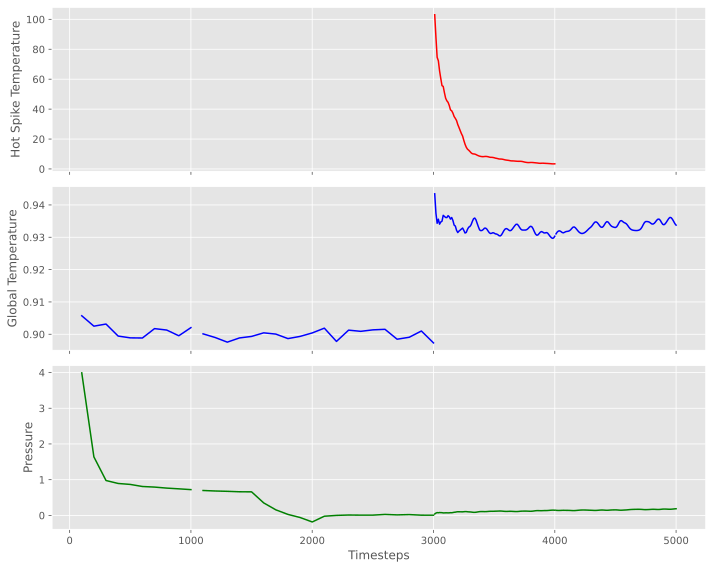

In [10]:
# r2 kt 8
radius = 3
kt = 100
energy = 0.9
target_pressure = .004

hdf5_file_stable = h5py.File(name='logStableLiquidenergy'+str(energy)+'.h5', mode='r')
timesteps_stable = np.float64(hdf5_file_stable['hoomd-data/Simulation/timestep'][:])
pressure_data_stable = np.float64(hdf5_file_stable['hoomd-data/md/compute/ThermodynamicQuantities/pressure'][:])
temperature_data_stable = np.float64(hdf5_file_stable['hoomd-data/md/compute/ThermodynamicQuantities/kinetic_temperature'][:])

hdf5_file_drop_pressure = h5py.File(name='logpressure'+str(target_pressure)+'energy'+str(energy)+'.h5', mode='r')
timesteps_drop_pressure = np.float64(hdf5_file_drop_pressure['hoomd-data/Simulation/timestep'][:])
temperature_data_drop_pressure = np.float64(hdf5_file_drop_pressure['hoomd-data/md/compute/ThermodynamicQuantities/kinetic_temperature'][:])
pressure_data_drop_pressure = np.float64(hdf5_file_drop_pressure['hoomd-data/md/compute/ThermodynamicQuantities/pressure'][:])

hdf5_file = h5py.File(name='r'+str(radius)+'kt'+str(kt)+'/heatSpike'+str(kt)+'energy'+str(energy)+'r'+str(radius)+'.h5', mode='r')
timesteps_spike = np.float64(hdf5_file['hoomd-data/Simulation/timestep'][:])
pressure_data_spike = np.float64(hdf5_file['hoomd-data/md/compute/ThermodynamicQuantities/pressure'][:])
temperature_data_spike = np.float64(hdf5_file['hoomd-data/md/compute/ThermodynamicQuantities/kinetic_temperature'][:])
temperature_data_only_heated = np.float64(hdf5_file['hoomd-data/md/compute/ThermodynamicQuantities_1/kinetic_temperature'][:])

hdf5_file_longer_run = h5py.File(name='r'+str(radius)+'kt'+str(kt)+'/longerRun'+str(kt)+'energy'+str(energy)+'r'+str(radius)+'.h5', mode='r')
timesteps_longer_run = np.float64(hdf5_file_longer_run['hoomd-data/Simulation/timestep'][:])
pressure_data_longer_run = np.float64(hdf5_file_longer_run['hoomd-data/md/compute/ThermodynamicQuantities/pressure'][:])
temperature_data_longer_run = np.float64(hdf5_file_longer_run['hoomd-data/md/compute/ThermodynamicQuantities/kinetic_temperature'][:])

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 8), sharex=True)

ax1.plot(timesteps_spike, temperature_data_only_heated, color='red')
ax1.set_ylabel('Hot Spike Temperature')

ax2.plot(timesteps_stable, temperature_data_stable, color='blue')
ax2.plot(timesteps_drop_pressure, temperature_data_drop_pressure, color='blue')
ax2.plot(timesteps_spike, temperature_data_spike, color='blue')
ax2.plot(timesteps_longer_run, (temperature_data_longer_run), color='blue')
ax2.set_ylabel('Global Temperature')

ax3.plot(timesteps_stable, (pressure_data_stable), color='green')
ax3.plot(timesteps_drop_pressure, (pressure_data_drop_pressure), color='green')
ax3.plot(timesteps_spike, (pressure_data_spike), color='green')  # Taking log of pressure_data_spike
ax3.plot(timesteps_longer_run,(pressure_data_longer_run), color='green')
ax3.set_ylabel('Pressure')
ax3.set_xlabel('Timesteps')

plt.tight_layout()
plt.show()


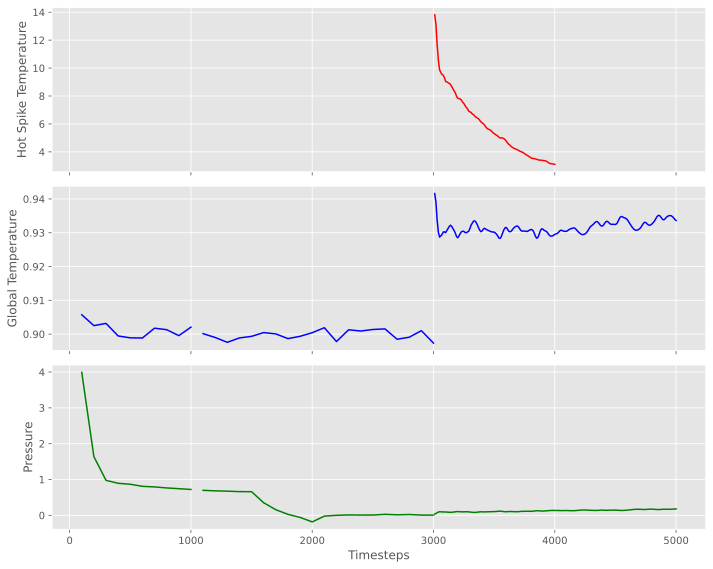

In [12]:
radius = 6
kt = 14
energy = 0.9
target_pressure = .004

hdf5_file_stable = h5py.File(name='logStableLiquidenergy'+str(energy)+'.h5', mode='r')
timesteps_stable = np.float64(hdf5_file_stable['hoomd-data/Simulation/timestep'][:])
pressure_data_stable = np.float64(hdf5_file_stable['hoomd-data/md/compute/ThermodynamicQuantities/pressure'][:])
temperature_data_stable = np.float64(hdf5_file_stable['hoomd-data/md/compute/ThermodynamicQuantities/kinetic_temperature'][:])

hdf5_file_drop_pressure = h5py.File(name='logpressure'+str(target_pressure)+'energy'+str(energy)+'.h5', mode='r')
timesteps_drop_pressure = np.float64(hdf5_file_drop_pressure['hoomd-data/Simulation/timestep'][:])
temperature_data_drop_pressure = np.float64(hdf5_file_drop_pressure['hoomd-data/md/compute/ThermodynamicQuantities/kinetic_temperature'][:])
pressure_data_drop_pressure = np.float64(hdf5_file_drop_pressure['hoomd-data/md/compute/ThermodynamicQuantities/pressure'][:])

hdf5_file = h5py.File(name='r'+str(radius)+'kt'+str(kt)+'/heatSpike'+str(kt)+'energy'+str(energy)+'r'+str(radius)+'.h5', mode='r')
timesteps_spike = np.float64(hdf5_file['hoomd-data/Simulation/timestep'][:])
pressure_data_spike = np.float64(hdf5_file['hoomd-data/md/compute/ThermodynamicQuantities/pressure'][:])
temperature_data_spike = np.float64(hdf5_file['hoomd-data/md/compute/ThermodynamicQuantities/kinetic_temperature'][:])
temperature_data_only_heated = np.float64(hdf5_file['hoomd-data/md/compute/ThermodynamicQuantities_1/kinetic_temperature'][:])

hdf5_file_longer_run = h5py.File(name='r'+str(radius)+'kt'+str(kt)+'/longerRun'+str(kt)+'energy'+str(energy)+'r'+str(radius)+'.h5', mode='r')
timesteps_longer_run = np.float64(hdf5_file_longer_run['hoomd-data/Simulation/timestep'][:])
pressure_data_longer_run = np.float64(hdf5_file_longer_run['hoomd-data/md/compute/ThermodynamicQuantities/pressure'][:])
temperature_data_longer_run = np.float64(hdf5_file_longer_run['hoomd-data/md/compute/ThermodynamicQuantities/kinetic_temperature'][:])

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 8), sharex=True)

ax1.plot(timesteps_spike, temperature_data_only_heated, color='red')
ax1.set_ylabel('Hot Spike Temperature')

ax2.plot(timesteps_stable, temperature_data_stable, color='blue')
ax2.plot(timesteps_drop_pressure, temperature_data_drop_pressure, color='blue')
ax2.plot(timesteps_spike, temperature_data_spike, color='blue')
ax2.plot(timesteps_longer_run, (temperature_data_longer_run), color='blue')
ax2.set_ylabel('Global Temperature')

ax3.plot(timesteps_stable, (pressure_data_stable), color='green')
ax3.plot(timesteps_drop_pressure, (pressure_data_drop_pressure), color='green')
ax3.plot(timesteps_spike, (pressure_data_spike), color='green')  # Taking log of pressure_data_spike
ax3.plot(timesteps_longer_run,(pressure_data_longer_run), color='green')
ax3.set_ylabel('Pressure')
ax3.set_xlabel('Timesteps')

plt.tight_layout()
plt.show()


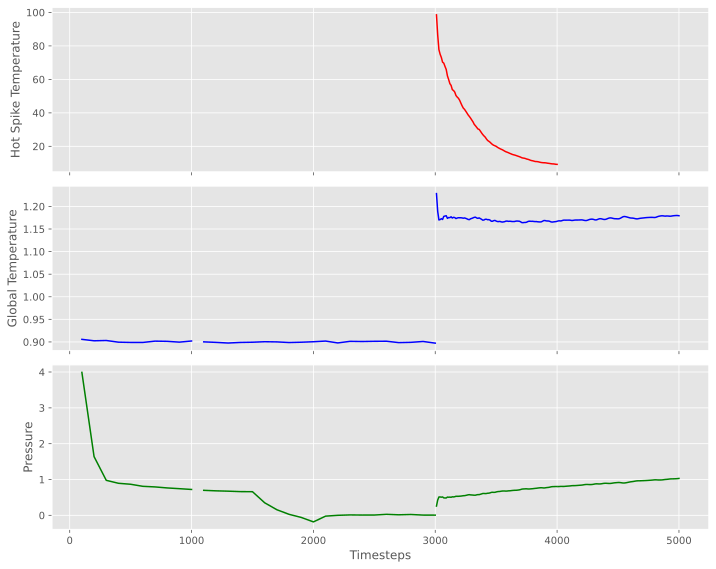

In [13]:
radius = 6
kt = 100
energy = 0.9
target_pressure = .004

hdf5_file_stable = h5py.File(name='logStableLiquidenergy'+str(energy)+'.h5', mode='r')
timesteps_stable = np.float64(hdf5_file_stable['hoomd-data/Simulation/timestep'][:])
pressure_data_stable = np.float64(hdf5_file_stable['hoomd-data/md/compute/ThermodynamicQuantities/pressure'][:])
temperature_data_stable = np.float64(hdf5_file_stable['hoomd-data/md/compute/ThermodynamicQuantities/kinetic_temperature'][:])

hdf5_file_drop_pressure = h5py.File(name='logpressure'+str(target_pressure)+'energy'+str(energy)+'.h5', mode='r')
timesteps_drop_pressure = np.float64(hdf5_file_drop_pressure['hoomd-data/Simulation/timestep'][:])
temperature_data_drop_pressure = np.float64(hdf5_file_drop_pressure['hoomd-data/md/compute/ThermodynamicQuantities/kinetic_temperature'][:])
pressure_data_drop_pressure = np.float64(hdf5_file_drop_pressure['hoomd-data/md/compute/ThermodynamicQuantities/pressure'][:])

hdf5_file = h5py.File(name='r'+str(radius)+'kt'+str(kt)+'/heatSpike'+str(kt)+'energy'+str(energy)+'r'+str(radius)+'.h5', mode='r')
timesteps_spike = np.float64(hdf5_file['hoomd-data/Simulation/timestep'][:])
pressure_data_spike = np.float64(hdf5_file['hoomd-data/md/compute/ThermodynamicQuantities/pressure'][:])
temperature_data_spike = np.float64(hdf5_file['hoomd-data/md/compute/ThermodynamicQuantities/kinetic_temperature'][:])
temperature_data_only_heated = np.float64(hdf5_file['hoomd-data/md/compute/ThermodynamicQuantities_1/kinetic_temperature'][:])

hdf5_file_longer_run = h5py.File(name='r'+str(radius)+'kt'+str(kt)+'/longerRun'+str(kt)+'energy'+str(energy)+'r'+str(radius)+'.h5', mode='r')
timesteps_longer_run = np.float64(hdf5_file_longer_run['hoomd-data/Simulation/timestep'][:])
pressure_data_longer_run = np.float64(hdf5_file_longer_run['hoomd-data/md/compute/ThermodynamicQuantities/pressure'][:])
temperature_data_longer_run = np.float64(hdf5_file_longer_run['hoomd-data/md/compute/ThermodynamicQuantities/kinetic_temperature'][:])

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 8), sharex=True)

ax1.plot(timesteps_spike, temperature_data_only_heated, color='red')
ax1.set_ylabel('Hot Spike Temperature')

ax2.plot(timesteps_stable, temperature_data_stable, color='blue')
ax2.plot(timesteps_drop_pressure, temperature_data_drop_pressure, color='blue')
ax2.plot(timesteps_spike, temperature_data_spike, color='blue')
ax2.plot(timesteps_longer_run, (temperature_data_longer_run), color='blue')
ax2.set_ylabel('Global Temperature')

ax3.plot(timesteps_stable, (pressure_data_stable), color='green')
ax3.plot(timesteps_drop_pressure, (pressure_data_drop_pressure), color='green')
ax3.plot(timesteps_spike, (pressure_data_spike), color='green')  # Taking log of pressure_data_spike
ax3.plot(timesteps_longer_run,(pressure_data_longer_run), color='green')
ax3.set_ylabel('Pressure')
ax3.set_xlabel('Timesteps')

plt.tight_layout()
plt.show()


In [14]:
data = """
7.00000E-01	2.01239E-03	8.43237E-01	1.38071E-03
7.01000E-01	2.03841E-03	8.42829E-01	1.40027E-03
7.02000E-01	2.06469E-03	8.42420E-01	1.42004E-03
7.03000E-01	2.09123E-03	8.42010E-01	1.44004E-03
7.04000E-01	2.11803E-03	8.41598E-01	1.46025E-03
7.05000E-01	2.14510E-03	8.41186E-01	1.48069E-03
7.06000E-01	2.17243E-03	8.40772E-01	1.50136E-03
7.07000E-01	2.20003E-03	8.40357E-01	1.52225E-03
7.08000E-01	2.22790E-03	8.39941E-01	1.54337E-03
7.09000E-01	2.25604E-03	8.39524E-01	1.56473E-03
7.10000E-01	2.28445E-03	8.39106E-01	1.58631E-03
7.11000E-01	2.31314E-03	8.38686E-01	1.60813E-03
7.12000E-01	2.34210E-03	8.38266E-01	1.63018E-03
7.13000E-01	2.37134E-03	8.37845E-01	1.65247E-03
7.14000E-01	2.40085E-03	8.37422E-01	1.67500E-03
7.15000E-01	2.43065E-03	8.36999E-01	1.69777E-03
7.16000E-01	2.46073E-03	8.36575E-01	1.72078E-03
7.17000E-01	2.49109E-03	8.36149E-01	1.74404E-03
7.18000E-01	2.52174E-03	8.35723E-01	1.76753E-03
7.19000E-01	2.55267E-03	8.35296E-01	1.79128E-03
7.20000E-01	2.58390E-03	8.34868E-01	1.81528E-03
7.21000E-01	2.61541E-03	8.34439E-01	1.83952E-03
7.22000E-01	2.64721E-03	8.34010E-01	1.86402E-03
7.23000E-01	2.67931E-03	8.33579E-01	1.88877E-03
7.24000E-01	2.71170E-03	8.33148E-01	1.91378E-03
7.25000E-01	2.74439E-03	8.32716E-01	1.93904E-03
7.26000E-01	2.77738E-03	8.32283E-01	1.96456E-03
7.27000E-01	2.81067E-03	8.31849E-01	1.99035E-03
7.28000E-01	2.84425E-03	8.31415E-01	2.01639E-03
7.29000E-01	2.87815E-03	8.30979E-01	2.04270E-03
7.30000E-01	2.91234E-03	8.30543E-01	2.06928E-03
7.31000E-01	2.94685E-03	8.30107E-01	2.09612E-03
7.32000E-01	2.98166E-03	8.29669E-01	2.12323E-03
7.33000E-01	3.01678E-03	8.29231E-01	2.15061E-03
7.34000E-01	3.05221E-03	8.28793E-01	2.17826E-03
7.35000E-01	3.08795E-03	8.28353E-01	2.20619E-03
7.36000E-01	3.12401E-03	8.27913E-01	2.23440E-03
7.37000E-01	3.16039E-03	8.27473E-01	2.26288E-03
7.38000E-01	3.19708E-03	8.27032E-01	2.29164E-03
7.39000E-01	3.23410E-03	8.26590E-01	2.32068E-03
7.40000E-01	3.27143E-03	8.26147E-01	2.35001E-03
7.41000E-01	3.30909E-03	8.25704E-01	2.37962E-03
7.42000E-01	3.34708E-03	8.25261E-01	2.40951E-03
7.43000E-01	3.38539E-03	8.24817E-01	2.43970E-03
7.44000E-01	3.42402E-03	8.24372E-01	2.47017E-03
7.45000E-01	3.46299E-03	8.23927E-01	2.50094E-03
7.46000E-01	3.50229E-03	8.23481E-01	2.53200E-03
7.47000E-01	3.54192E-03	8.23035E-01	2.56335E-03
7.48000E-01	3.58189E-03	8.22588E-01	2.59500E-03
7.49000E-01	3.62219E-03	8.22141E-01	2.62695E-03
7.50000E-01	3.66284E-03	8.21693E-01	2.65920E-03
7.51000E-01	3.70382E-03	8.21245E-01	2.69175E-03
7.52000E-01	3.74514E-03	8.20796E-01	2.72461E-03
7.53000E-01	3.78681E-03	8.20347E-01	2.75777E-03
7.54000E-01	3.82882E-03	8.19898E-01	2.79124E-03
7.55000E-01	3.87118E-03	8.19448E-01	2.82502E-03
7.56000E-01	3.91389E-03	8.18997E-01	2.85911E-03
7.57000E-01	3.95695E-03	8.18547E-01	2.89352E-03
7.58000E-01	4.00036E-03	8.18095E-01	2.92824E-03
7.59000E-01	4.04413E-03	8.17644E-01	2.96327E-03
7.60000E-01	4.08825E-03	8.17192E-01	2.99862E-03
7.61000E-01	4.13272E-03	8.16740E-01	3.03430E-03
7.62000E-01	4.17756E-03	8.16287E-01	3.07029E-03
7.63000E-01	4.22276E-03	8.15834E-01	3.10661E-03
7.64000E-01	4.26832E-03	8.15380E-01	3.14326E-03
7.65000E-01	4.31424E-03	8.14926E-01	3.18023E-03
7.66000E-01	4.36053E-03	8.14472E-01	3.21753E-03
7.67000E-01	4.40719E-03	8.14018E-01	3.25516E-03
7.68000E-01	4.45421E-03	8.13563E-01	3.29313E-03
7.69000E-01	4.50161E-03	8.13108E-01	3.33143E-03
7.70000E-01	4.54938E-03	8.12652E-01	3.37006E-03
7.71000E-01	4.59753E-03	8.12197E-01	3.40904E-03
7.72000E-01	4.64605E-03	8.11741E-01	3.44835E-03
7.73000E-01	4.69496E-03	8.11284E-01	3.48801E-03
7.74000E-01	4.74424E-03	8.10828E-01	3.52801E-03
7.75000E-01	4.79390E-03	8.10371E-01	3.56836E-03
7.76000E-01	4.84395E-03	8.09913E-01	3.60905E-03
7.77000E-01	4.89438E-03	8.09456E-01	3.65009E-03
7.78000E-01	4.94520E-03	8.08998E-01	3.69149E-03
7.79000E-01	4.99641E-03	8.08540E-01	3.73324E-03
7.80000E-01	5.04801E-03	8.08082E-01	3.77534E-03
7.81000E-01	5.10001E-03	8.07623E-01	3.81780E-03
7.82000E-01	5.15239E-03	8.07164E-01	3.86062E-03
7.83000E-01	5.20518E-03	8.06705E-01	3.90379E-03
7.84000E-01	5.25836E-03	8.06246E-01	3.94733E-03
7.85000E-01	5.31195E-03	8.05787E-01	3.99124E-03
7.86000E-01	5.36593E-03	8.05327E-01	4.03551E-03
7.87000E-01	5.42032E-03	8.04867E-01	4.08015E-03
7.88000E-01	5.47511E-03	8.04407E-01	4.12516E-03
7.89000E-01	5.53032E-03	8.03946E-01	4.17054E-03
7.90000E-01	5.58593E-03	8.03485E-01	4.21629E-03
7.91000E-01	5.64195E-03	8.03025E-01	4.26242E-03
7.92000E-01	5.69839E-03	8.02563E-01	4.30893E-03
7.93000E-01	5.75524E-03	8.02102E-01	4.35582E-03
7.94000E-01	5.81250E-03	8.01641E-01	4.40309E-03
7.95000E-01	5.87019E-03	8.01179E-01	4.45074E-03
7.96000E-01	5.92830E-03	8.00717E-01	4.49877E-03
7.97000E-01	5.98682E-03	8.00255E-01	4.54720E-03
7.98000E-01	6.04578E-03	7.99792E-01	4.59601E-03
7.99000E-01	6.10516E-03	7.99330E-01	4.64521E-03
8.00000E-01	6.16496E-03	7.98867E-01	4.69480E-03
8.01000E-01	6.22520E-03	7.98404E-01	4.74479E-03
8.02000E-01	6.28587E-03	7.97941E-01	4.79518E-03
8.03000E-01	6.34698E-03	7.97478E-01	4.84596E-03
8.04000E-01	6.40851E-03	7.97014E-01	4.89714E-03
8.05000E-01	6.47049E-03	7.96551E-01	4.94873E-03
8.06000E-01	6.53291E-03	7.96087E-01	5.00072E-03
8.07000E-01	6.59577E-03	7.95623E-01	5.05311E-03
8.08000E-01	6.65907E-03	7.95158E-01	5.10592E-03
8.09000E-01	6.72281E-03	7.94694E-01	5.15913E-03
8.10000E-01	6.78701E-03	7.94229E-01	5.21275E-03
8.11000E-01	6.85165E-03	7.93765E-01	5.26679E-03
8.12000E-01	6.91674E-03	7.93300E-01	5.32124E-03
8.13000E-01	6.98229E-03	7.92835E-01	5.37611E-03
8.14000E-01	7.04830E-03	7.92369E-01	5.43140E-03
8.15000E-01	7.11476E-03	7.91904E-01	5.48712E-03
8.16000E-01	7.18168E-03	7.91438E-01	5.54325E-03
8.17000E-01	7.24906E-03	7.90973E-01	5.59981E-03
8.18000E-01	7.31690E-03	7.90507E-01	5.65680E-03
8.19000E-01	7.38521E-03	7.90041E-01	5.71421E-03
8.20000E-01	7.45398E-03	7.89574E-01	5.77206E-03
8.21000E-01	7.52323E-03	7.89108E-01	5.83034E-03
8.22000E-01	7.59295E-03	7.88641E-01	5.88905E-03
8.23000E-01	7.66314E-03	7.88174E-01	5.94820E-03
8.24000E-01	7.73380E-03	7.87708E-01	6.00779E-03
8.25000E-01	7.80494E-03	7.87240E-01	6.06783E-03
8.26000E-01	7.87656E-03	7.86773E-01	6.12830E-03
8.27000E-01	7.94867E-03	7.86306E-01	6.18922E-03
8.28000E-01	8.02125E-03	7.85838E-01	6.25058E-03
8.29000E-01	8.09432E-03	7.85370E-01	6.31239E-03
8.30000E-01	8.16788E-03	7.84902E-01	6.37466E-03
8.31000E-01	8.24193E-03	7.84434E-01	6.43737E-03
8.32000E-01	8.31647E-03	7.83966E-01	6.50054E-03
8.33000E-01	8.39151E-03	7.83497E-01	6.56417E-03
8.34000E-01	8.46704E-03	7.83029E-01	6.62825E-03
8.35000E-01	8.54306E-03	7.82560E-01	6.69280E-03
8.36000E-01	8.61959E-03	7.82091E-01	6.75781E-03
8.37000E-01	8.69662E-03	7.81622E-01	6.82328E-03
8.38000E-01	8.77416E-03	7.81153E-01	6.88922E-03
8.39000E-01	8.85220E-03	7.80683E-01	6.95562E-03
8.40000E-01	8.93075E-03	7.80213E-01	7.02250E-03
8.41000E-01	9.00981E-03	7.79744E-01	7.08985E-03
8.42000E-01	9.08938E-03	7.79274E-01	7.15767E-03
8.43000E-01	9.16947E-03	7.78803E-01	7.22597E-03
8.44000E-01	9.25007E-03	7.78333E-01	7.29474E-03
8.45000E-01	9.33120E-03	7.77863E-01	7.36400E-03
8.46000E-01	9.41284E-03	7.77392E-01	7.43374E-03
8.47000E-01	9.49501E-03	7.76921E-01	7.50396E-03
8.48000E-01	9.57771E-03	7.76450E-01	7.57467E-03
8.49000E-01	9.66093E-03	7.75979E-01	7.64587E-03
8.50000E-01	9.74468E-03	7.75507E-01	7.71756E-03
8.51000E-01	9.82897E-03	7.75035E-01	7.78973E-03
8.52000E-01	9.91379E-03	7.74564E-01	7.86241E-03
8.53000E-01	9.99915E-03	7.74092E-01	7.93558E-03
8.54000E-01	1.00850E-02	7.73619E-01	8.00924E-03
8.55000E-01	1.01715E-02	7.73147E-01	8.08341E-03
8.56000E-01	1.02585E-02	7.72674E-01	8.15808E-03
8.57000E-01	1.03460E-02	7.72202E-01	8.23325E-03
8.58000E-01	1.04341E-02	7.71729E-01	8.30893E-03
8.59000E-01	1.05227E-02	7.71255E-01	8.38512E-03
8.60000E-01	1.06119E-02	7.70782E-01	8.46181E-03
8.61000E-01	1.07016E-02	7.70308E-01	8.53902E-03
8.62000E-01	1.07919E-02	7.69835E-01	8.61675E-03
8.63000E-01	1.08828E-02	7.69361E-01	8.69499E-03
8.64000E-01	1.09742E-02	7.68886E-01	8.77374E-03
8.65000E-01	1.10661E-02	7.68412E-01	8.85302E-03
8.66000E-01	1.11587E-02	7.67937E-01	8.93282E-03
8.67000E-01	1.12518E-02	7.67463E-01	9.01314E-03
8.68000E-01	1.13455E-02	7.66987E-01	9.09399E-03
8.69000E-01	1.14397E-02	7.66512E-01	9.17537E-03
8.70000E-01	1.15346E-02	7.66037E-01	9.25728E-03
8.71000E-01	1.16300E-02	7.65561E-01	9.33972E-03
8.72000E-01	1.17260E-02	7.65085E-01	9.42270E-03
8.73000E-01	1.18226E-02	7.64609E-01	9.50621E-03
8.74000E-01	1.19197E-02	7.64132E-01	9.59026E-03
8.75000E-01	1.20175E-02	7.63656E-01	9.67485E-03
8.76000E-01	1.21158E-02	7.63179E-01	9.75998E-03
8.77000E-01	1.22147E-02	7.62702E-01	9.84565E-03
8.78000E-01	1.23143E-02	7.62224E-01	9.93188E-03
8.79000E-01	1.24144E-02	7.61747E-01	1.00186E-02
8.80000E-01	1.25151E-02	7.61269E-01	1.01060E-02
8.81000E-01	1.26165E-02	7.60791E-01	1.01938E-02
8.82000E-01	1.27184E-02	7.60312E-01	1.02823E-02
8.83000E-01	1.28209E-02	7.59834E-01	1.03713E-02
8.84000E-01	1.29241E-02	7.59355E-01	1.04608E-02
8.85000E-01	1.30279E-02	7.58876E-01	1.05509E-02
8.86000E-01	1.31322E-02	7.58396E-01	1.06416E-02
8.87000E-01	1.32372E-02	7.57917E-01	1.07328E-02
8.88000E-01	1.33429E-02	7.57437E-01	1.08246E-02
8.89000E-01	1.34491E-02	7.56957E-01	1.09170E-02
8.90000E-01	1.35560E-02	7.56476E-01	1.10099E-02
8.91000E-01	1.36635E-02	7.55995E-01	1.11034E-02
8.92000E-01	1.37716E-02	7.55514E-01	1.11975E-02
8.93000E-01	1.38804E-02	7.55033E-01	1.12922E-02
8.94000E-01	1.39898E-02	7.54551E-01	1.13874E-02
8.95000E-01	1.40998E-02	7.54070E-01	1.14833E-02
8.96000E-01	1.42105E-02	7.53587E-01	1.15797E-02
8.97000E-01	1.43218E-02	7.53105E-01	1.16767E-02
8.98000E-01	1.44338E-02	7.52622E-01	1.17742E-02
8.99000E-01	1.45464E-02	7.52139E-01	1.18724E-02
9.00000E-01	1.46597E-02	7.51656E-01	1.19712E-02
9.01000E-01	1.47736E-02	7.51172E-01	1.20705E-02
9.02000E-01	1.48882E-02	7.50688E-01	1.21705E-02
9.03000E-01	1.50034E-02	7.50204E-01	1.22710E-02
9.04000E-01	1.51193E-02	7.49719E-01	1.23722E-02
9.05000E-01	1.52359E-02	7.49234E-01	1.24739E-02
9.06000E-01	1.53531E-02	7.48749E-01	1.25763E-02
9.07000E-01	1.54710E-02	7.48264E-01	1.26792E-02
9.08000E-01	1.55896E-02	7.47778E-01	1.27828E-02
9.09000E-01	1.57089E-02	7.47292E-01	1.28870E-02
9.10000E-01	1.58288E-02	7.46805E-01	1.29918E-02
9.11000E-01	1.59494E-02	7.46318E-01	1.30972E-02
9.12000E-01	1.60707E-02	7.45831E-01	1.32032E-02
9.13000E-01	1.61927E-02	7.45343E-01	1.33098E-02
9.14000E-01	1.63154E-02	7.44855E-01	1.34171E-02
9.15000E-01	1.64388E-02	7.44367E-01	1.35250E-02
9.16000E-01	1.65629E-02	7.43879E-01	1.36335E-02
9.17000E-01	1.66877E-02	7.43390E-01	1.37426E-02
9.18000E-01	1.68131E-02	7.42900E-01	1.38524E-02
9.19000E-01	1.69393E-02	7.42411E-01	1.39628E-02
9.20000E-01	1.70662E-02	7.41920E-01	1.40738E-02
9.21000E-01	1.71938E-02	7.41430E-01	1.41855E-02
9.22000E-01	1.73222E-02	7.40939E-01	1.42978E-02
9.23000E-01	1.74512E-02	7.40448E-01	1.44107E-02
9.24000E-01	1.75809E-02	7.39956E-01	1.45243E-02
9.25000E-01	1.77114E-02	7.39464E-01	1.46385E-02
9.26000E-01	1.78426E-02	7.38972E-01	1.47534E-02
9.27000E-01	1.79746E-02	7.38479E-01	1.48689E-02
9.28000E-01	1.81073E-02	7.37986E-01	1.49851E-02
9.29000E-01	1.82407E-02	7.37493E-01	1.51019E-02
9.30000E-01	1.83748E-02	7.36999E-01	1.52193E-02
9.31000E-01	1.85097E-02	7.36504E-01	1.53375E-02
9.32000E-01	1.86453E-02	7.36010E-01	1.54563E-02
9.33000E-01	1.87817E-02	7.35514E-01	1.55757E-02
9.34000E-01	1.89188E-02	7.35019E-01	1.56958E-02
9.35000E-01	1.90567E-02	7.34523E-01	1.58166E-02
9.36000E-01	1.91954E-02	7.34026E-01	1.59380E-02
9.37000E-01	1.93348E-02	7.33529E-01	1.60601E-02
9.38000E-01	1.94750E-02	7.33032E-01	1.61829E-02
9.39000E-01	1.96159E-02	7.32534E-01	1.63064E-02
9.40000E-01	1.97576E-02	7.32036E-01	1.64305E-02
9.41000E-01	1.99001E-02	7.31537E-01	1.65553E-02
9.42000E-01	2.00434E-02	7.31038E-01	1.66808E-02
9.43000E-01	2.01874E-02	7.30539E-01	1.68069E-02
9.44000E-01	2.03323E-02	7.30039E-01	1.69338E-02
9.45000E-01	2.04779E-02	7.29538E-01	1.70613E-02
9.46000E-01	2.06243E-02	7.29037E-01	1.71895E-02
9.47000E-01	2.07715E-02	7.28536E-01	1.73184E-02
9.48000E-01	2.09195E-02	7.28034E-01	1.74480E-02
9.49000E-01	2.10683E-02	7.27531E-01	1.75783E-02
9.50000E-01	2.12179E-02	7.27029E-01	1.77093E-02
9.51000E-01	2.13683E-02	7.26525E-01	1.78410E-02
9.52000E-01	2.15196E-02	7.26021E-01	1.79734E-02
9.53000E-01	2.16716E-02	7.25517E-01	1.81065E-02
9.54000E-01	2.18245E-02	7.25012E-01	1.82403E-02
9.55000E-01	2.19782E-02	7.24507E-01	1.83748E-02
9.56000E-01	2.21327E-02	7.24001E-01	1.85100E-02
9.57000E-01	2.22880E-02	7.23494E-01	1.86459E-02
9.58000E-01	2.24442E-02	7.22988E-01	1.87825E-02
9.59000E-01	2.26012E-02	7.22480E-01	1.89199E-02
9.60000E-01	2.27591E-02	7.21972E-01	1.90579E-02
9.61000E-01	2.29178E-02	7.21464E-01	1.91967E-02
9.62000E-01	2.30773E-02	7.20955E-01	1.93362E-02
9.63000E-01	2.32377E-02	7.20445E-01	1.94764E-02
9.64000E-01	2.33990E-02	7.19935E-01	1.96174E-02
9.65000E-01	2.35611E-02	7.19424E-01	1.97591E-02
9.66000E-01	2.37241E-02	7.18913E-01	1.99015E-02
9.67000E-01	2.38879E-02	7.18401E-01	2.00446E-02
9.68000E-01	2.40527E-02	7.17889E-01	2.01885E-02
9.69000E-01	2.42182E-02	7.17376E-01	2.03331E-02
9.70000E-01	2.43847E-02	7.16863E-01	2.04785E-02
9.71000E-01	2.45521E-02	7.16348E-01	2.06246E-02
9.72000E-01	2.47203E-02	7.15834E-01	2.07714E-02
9.73000E-01	2.48895E-02	7.15319E-01	2.09190E-02
9.74000E-01	2.50595E-02	7.14803E-01	2.10673E-02
9.75000E-01	2.52304E-02	7.14286E-01	2.12164E-02
9.76000E-01	2.54023E-02	7.13769E-01	2.13662E-02
9.77000E-01	2.55750E-02	7.13252E-01	2.15168E-02
9.78000E-01	2.57487E-02	7.12733E-01	2.16681E-02
9.79000E-01	2.59232E-02	7.12215E-01	2.18202E-02
9.80000E-01	2.60987E-02	7.11695E-01	2.19731E-02
9.81000E-01	2.62752E-02	7.11175E-01	2.21267E-02
9.82000E-01	2.64525E-02	7.10654E-01	2.22811E-02
9.83000E-01	2.66308E-02	7.10133E-01	2.24362E-02
9.84000E-01	2.68100E-02	7.09611E-01	2.25921E-02
9.85000E-01	2.69901E-02	7.09088E-01	2.27488E-02
9.86000E-01	2.71712E-02	7.08565E-01	2.29062E-02
9.87000E-01	2.73533E-02	7.08041E-01	2.30645E-02
9.88000E-01	2.75363E-02	7.07516E-01	2.32235E-02
9.89000E-01	2.77203E-02	7.06991E-01	2.33833E-02
9.90000E-01	2.79052E-02	7.06465E-01	2.35438E-02
9.91000E-01	2.80911E-02	7.05938E-01	2.37052E-02
9.92000E-01	2.82780E-02	7.05411E-01	2.38673E-02
9.93000E-01	2.84658E-02	7.04883E-01	2.40302E-02
9.94000E-01	2.86546E-02	7.04354E-01	2.41940E-02
9.95000E-01	2.88445E-02	7.03825E-01	2.43585E-02
9.96000E-01	2.90353E-02	7.03295E-01	2.45238E-02
9.97000E-01	2.92271E-02	7.02764E-01	2.46898E-02
9.98000E-01	2.94199E-02	7.02232E-01	2.48567E-02
9.99000E-01	2.96137E-02	7.01700E-01	2.50244E-02
1.00000E+00	2.98085E-02	7.01167E-01	2.51929E-02
1.00100E+00	3.00043E-02	7.00633E-01	2.53622E-02
1.00200E+00	3.02012E-02	7.00099E-01	2.55323E-02
1.00300E+00	3.03991E-02	6.99563E-01	2.57033E-02
1.00400E+00	3.05980E-02	6.99027E-01	2.58750E-02
1.00500E+00	3.07979E-02	6.98491E-01	2.60475E-02
1.00600E+00	3.09989E-02	6.97953E-01	2.62209E-02
1.00700E+00	3.12010E-02	6.97415E-01	2.63951E-02
1.00800E+00	3.14040E-02	6.96876E-01	2.65701E-02
1.00900E+00	3.16082E-02	6.96336E-01	2.67459E-02
1.01000E+00	3.18134E-02	6.95795E-01	2.69225E-02
1.01100E+00	3.20196E-02	6.95254E-01	2.71000E-02
1.01200E+00	3.22270E-02	6.94712E-01	2.72783E-02
1.01300E+00	3.24354E-02	6.94169E-01	2.74574E-02
1.01400E+00	3.26449E-02	6.93625E-01	2.76374E-02
1.01500E+00	3.28555E-02	6.93080E-01	2.78182E-02
1.01600E+00	3.30671E-02	6.92535E-01	2.79998E-02
1.01700E+00	3.32799E-02	6.91989E-01	2.81823E-02
1.01800E+00	3.34938E-02	6.91441E-01	2.83656E-02
1.01900E+00	3.37088E-02	6.90894E-01	2.85497E-02
1.02000E+00	3.39249E-02	6.90345E-01	2.87347E-02
1.02100E+00	3.41421E-02	6.89795E-01	2.89206E-02
1.02200E+00	3.43604E-02	6.89244E-01	2.91073E-02
1.02300E+00	3.45799E-02	6.88693E-01	2.92949E-02
1.02400E+00	3.48005E-02	6.88141E-01	2.94833E-02
1.02500E+00	3.50223E-02	6.87588E-01	2.96725E-02
1.02600E+00	3.52452E-02	6.87034E-01	2.98627E-02
1.02700E+00	3.54693E-02	6.86479E-01	3.00537E-02
1.02800E+00	3.56945E-02	6.85923E-01	3.02455E-02
1.02900E+00	3.59209E-02	6.85366E-01	3.04382E-02
1.03000E+00	3.61485E-02	6.84808E-01	3.06318E-02
1.03100E+00	3.63772E-02	6.84250E-01	3.08263E-02
1.03200E+00	3.66072E-02	6.83690E-01	3.10216E-02
1.03300E+00	3.68383E-02	6.83130E-01	3.12178E-02
1.03400E+00	3.70706E-02	6.82568E-01	3.14149E-02
1.03500E+00	3.73042E-02	6.82006E-01	3.16128E-02
1.03600E+00	3.75389E-02	6.81443E-01	3.18117E-02
1.03700E+00	3.77749E-02	6.80878E-01	3.20114E-02
1.03800E+00	3.80121E-02	6.80313E-01	3.22120E-02
1.03900E+00	3.82505E-02	6.79747E-01	3.24135E-02
1.04000E+00	3.84902E-02	6.79179E-01	3.26159E-02
1.04100E+00	3.87311E-02	6.78611E-01	3.28192E-02
1.04200E+00	3.89732E-02	6.78042E-01	3.30234E-02
1.04300E+00	3.92166E-02	6.77472E-01	3.32284E-02
1.04400E+00	3.94613E-02	6.76900E-01	3.34344E-02
1.04500E+00	3.97073E-02	6.76328E-01	3.36413E-02
1.04600E+00	3.99545E-02	6.75755E-01	3.38490E-02
1.04700E+00	4.02030E-02	6.75180E-01	3.40577E-02
1.04800E+00	4.04528E-02	6.74605E-01	3.42673E-02
1.04900E+00	4.07040E-02	6.74028E-01	3.44778E-02
1.05000E+00	4.09564E-02	6.73451E-01	3.46892E-02
1.05100E+00	4.12101E-02	6.72872E-01	3.49016E-02
1.05200E+00	4.14652E-02	6.72292E-01	3.51148E-02
1.05300E+00	4.17216E-02	6.71712E-01	3.53290E-02
1.05400E+00	4.19793E-02	6.71130E-01	3.55440E-02
1.05500E+00	4.22384E-02	6.70547E-01	3.57600E-02
1.05600E+00	4.24988E-02	6.69962E-01	3.59770E-02
1.05700E+00	4.27606E-02	6.69377E-01	3.61948E-02
1.05800E+00	4.30238E-02	6.68791E-01	3.64136E-02
1.05900E+00	4.32883E-02	6.68203E-01	3.66334E-02
1.06000E+00	4.35542E-02	6.67614E-01	3.68540E-02
1.06100E+00	4.38215E-02	6.67024E-01	3.70756E-02
1.06200E+00	4.40903E-02	6.66433E-01	3.72981E-02
1.06300E+00	4.43604E-02	6.65841E-01	3.75216E-02
1.06400E+00	4.46319E-02	6.65247E-01	3.77460E-02
1.06500E+00	4.49049E-02	6.64653E-01	3.79714E-02
1.06600E+00	4.51793E-02	6.64057E-01	3.81977E-02
1.06700E+00	4.54552E-02	6.63460E-01	3.84250E-02
1.06800E+00	4.57325E-02	6.62861E-01	3.86532E-02
1.06900E+00	4.60113E-02	6.62262E-01	3.88824E-02
1.07000E+00	4.62915E-02	6.61661E-01	3.91125E-02
1.07100E+00	4.65732E-02	6.61059E-01	3.93436E-02
1.07200E+00	4.68564E-02	6.60455E-01	3.95756E-02
1.07300E+00	4.71411E-02	6.59851E-01	3.98087E-02
1.07400E+00	4.74273E-02	6.59245E-01	4.00426E-02
1.07500E+00	4.77150E-02	6.58637E-01	4.02776E-02
1.07600E+00	4.80043E-02	6.58029E-01	4.05135E-02
1.07700E+00	4.82951E-02	6.57419E-01	4.07504E-02
1.07800E+00	4.85874E-02	6.56808E-01	4.09883E-02
1.07900E+00	4.88813E-02	6.56195E-01	4.12271E-02
1.08000E+00	4.91768E-02	6.55581E-01	4.14670E-02
1.08100E+00	4.94738E-02	6.54966E-01	4.17078E-02
1.08200E+00	4.97724E-02	6.54349E-01	4.19496E-02
1.08300E+00	5.00726E-02	6.53731E-01	4.21924E-02
1.08400E+00	5.03744E-02	6.53111E-01	4.24361E-02
1.08500E+00	5.06778E-02	6.52491E-01	4.26809E-02
1.08600E+00	5.09829E-02	6.51868E-01	4.29267E-02
1.08700E+00	5.12896E-02	6.51244E-01	4.31734E-02
1.08800E+00	5.15979E-02	6.50619E-01	4.34212E-02
1.08900E+00	5.19079E-02	6.49992E-01	4.36699E-02
1.09000E+00	5.22195E-02	6.49364E-01	4.39197E-02
1.09100E+00	5.25329E-02	6.48734E-01	4.41704E-02
1.09200E+00	5.28479E-02	6.48103E-01	4.44222E-02
1.09300E+00	5.31647E-02	6.47471E-01	4.46750E-02
1.09400E+00	5.34831E-02	6.46836E-01	4.49288E-02
1.09500E+00	5.38033E-02	6.46200E-01	4.51836E-02
1.09600E+00	5.41252E-02	6.45563E-01	4.54394E-02
1.09700E+00	5.44489E-02	6.44924E-01	4.56963E-02
1.09800E+00	5.47743E-02	6.44284E-01	4.59542E-02
1.09900E+00	5.51015E-02	6.43642E-01	4.62131E-02
1.10000E+00	5.54305E-02	6.42998E-01	4.64730E-02
1.10100E+00	5.57613E-02	6.42353E-01	4.67339E-02
1.10200E+00	5.60939E-02	6.41706E-01	4.69959E-02
1.10300E+00	5.64283E-02	6.41057E-01	4.72589E-02
1.10400E+00	5.67646E-02	6.40407E-01	4.75230E-02
1.10500E+00	5.71027E-02	6.39755E-01	4.77881E-02
1.10600E+00	5.74427E-02	6.39101E-01	4.80542E-02
1.10700E+00	5.77846E-02	6.38446E-01	4.83214E-02
1.10800E+00	5.81283E-02	6.37789E-01	4.85896E-02
1.10900E+00	5.84740E-02	6.37130E-01	4.88589E-02
1.11000E+00	5.88215E-02	6.36469E-01	4.91292E-02
1.11100E+00	5.91711E-02	6.35807E-01	4.94006E-02
1.11200E+00	5.95225E-02	6.35142E-01	4.96730E-02
1.11300E+00	5.98759E-02	6.34476E-01	4.99465E-02
1.11400E+00	6.02313E-02	6.33809E-01	5.02211E-02
1.11500E+00	6.05887E-02	6.33139E-01	5.04967E-02
1.11600E+00	6.09481E-02	6.32467E-01	5.07734E-02
1.11700E+00	6.13096E-02	6.31794E-01	5.10511E-02
1.11800E+00	6.16730E-02	6.31119E-01	5.13299E-02
1.11900E+00	6.20385E-02	6.30441E-01	5.16098E-02
1.12000E+00	6.24061E-02	6.29762E-01	5.18908E-02
1.12100E+00	6.27758E-02	6.29081E-01	5.21728E-02
1.12200E+00	6.31476E-02	6.28398E-01	5.24560E-02
1.12300E+00	6.35215E-02	6.27713E-01	5.27402E-02
1.12400E+00	6.38975E-02	6.27026E-01	5.30255E-02
1.12500E+00	6.42757E-02	6.26337E-01	5.33118E-02
1.12600E+00	6.46561E-02	6.25646E-01	5.35993E-02
1.12700E+00	6.50386E-02	6.24953E-01	5.38879E-02
1.12800E+00	6.54234E-02	6.24257E-01	5.41775E-02
1.12900E+00	6.58104E-02	6.23560E-01	5.44683E-02
1.13000E+00	6.61996E-02	6.22860E-01	5.47601E-02
1.13100E+00	6.65911E-02	6.22159E-01	5.50531E-02
1.13200E+00	6.69848E-02	6.21455E-01	5.53472E-02
1.13300E+00	6.73809E-02	6.20749E-01	5.56423E-02
1.13400E+00	6.77793E-02	6.20041E-01	5.59386E-02
1.13500E+00	6.81800E-02	6.19330E-01	5.62360E-02
1.13600E+00	6.85831E-02	6.18618E-01	5.65345E-02
1.13700E+00	6.89885E-02	6.17903E-01	5.68341E-02
1.13800E+00	6.93964E-02	6.17185E-01	5.71349E-02
1.13900E+00	6.98067E-02	6.16466E-01	5.74367E-02
1.14000E+00	7.02194E-02	6.15744E-01	5.77397E-02
1.14100E+00	7.06346E-02	6.15019E-01	5.80439E-02
1.14200E+00	7.10522E-02	6.14292E-01	5.83491E-02
1.14300E+00	7.14724E-02	6.13563E-01	5.86555E-02
1.14400E+00	7.18951E-02	6.12832E-01	5.89630E-02
1.14500E+00	7.23204E-02	6.12098E-01	5.92717E-02
1.14600E+00	7.27482E-02	6.11361E-01	5.95815E-02
1.14700E+00	7.31786E-02	6.10622E-01	5.98924E-02
1.14800E+00	7.36117E-02	6.09880E-01	6.02045E-02
1.14900E+00	7.40474E-02	6.09136E-01	6.05178E-02
1.15000E+00	7.44858E-02	6.08389E-01	6.08322E-02
1.15100E+00	7.49268E-02	6.07639E-01	6.11477E-02
1.15200E+00	7.53706E-02	6.06887E-01	6.14644E-02
1.15300E+00	7.58172E-02	6.06132E-01	6.17823E-02
1.15400E+00	7.62665E-02	6.05375E-01	6.21013E-02
1.15500E+00	7.67186E-02	6.04614E-01	6.24215E-02
1.15600E+00	7.71736E-02	6.03851E-01	6.27428E-02
1.15700E+00	7.76314E-02	6.03085E-01	6.30654E-02
1.15800E+00	7.80921E-02	6.02316E-01	6.33891E-02
1.15900E+00	7.85557E-02	6.01544E-01	6.37139E-02
1.16000E+00	7.90223E-02	6.00770E-01	6.40400E-02
1.16100E+00	7.94918E-02	5.99992E-01	6.43672E-02
1.16200E+00	7.99644E-02	5.99211E-01	6.46957E-02
1.16300E+00	8.04399E-02	5.98428E-01	6.50253E-02
1.16400E+00	8.09186E-02	5.97641E-01	6.53561E-02
1.16500E+00	8.14003E-02	5.96851E-01	6.56881E-02
1.16600E+00	8.18852E-02	5.96058E-01	6.60213E-02
1.16700E+00	8.23732E-02	5.95262E-01	6.63556E-02
1.16800E+00	8.28645E-02	5.94463E-01	6.66912E-02
1.16900E+00	8.33589E-02	5.93660E-01	6.70280E-02
1.17000E+00	8.38567E-02	5.92855E-01	6.73660E-02
1.17100E+00	8.43577E-02	5.92045E-01	6.77052E-02
1.17200E+00	8.48621E-02	5.91233E-01	6.80456E-02
1.17300E+00	8.53698E-02	5.90417E-01	6.83873E-02
1.17400E+00	8.58810E-02	5.89597E-01	6.87301E-02
1.17500E+00	8.63956E-02	5.88774E-01	6.90742E-02
1.17600E+00	8.69137E-02	5.87948E-01	6.94195E-02
1.17700E+00	8.74353E-02	5.87118E-01	6.97660E-02
1.17800E+00	8.79605E-02	5.86284E-01	7.01138E-02
1.17900E+00	8.84893E-02	5.85447E-01	7.04628E-02
1.18000E+00	8.90218E-02	5.84606E-01	7.08130E-02
1.18100E+00	8.95580E-02	5.83761E-01	7.11644E-02
1.18200E+00	9.00979E-02	5.82912E-01	7.15171E-02
1.18300E+00	9.06416E-02	5.82060E-01	7.18711E-02
1.18400E+00	9.11891E-02	5.81203E-01	7.22263E-02
1.18500E+00	9.17405E-02	5.80342E-01	7.25827E-02
1.18600E+00	9.22958E-02	5.79478E-01	7.29404E-02
1.18700E+00	9.28552E-02	5.78609E-01	7.32994E-02
1.18800E+00	9.34185E-02	5.77736E-01	7.36596E-02
1.18900E+00	9.39859E-02	5.76859E-01	7.40211E-02
1.19000E+00	9.45574E-02	5.75978E-01	7.43838E-02
1.19100E+00	9.51331E-02	5.75092E-01	7.47479E-02
1.19200E+00	9.57131E-02	5.74202E-01	7.51131E-02
1.19300E+00	9.62973E-02	5.73308E-01	7.54797E-02
1.19400E+00	9.68859E-02	5.72409E-01	7.58475E-02
1.19500E+00	9.74789E-02	5.71505E-01	7.62167E-02
1.19600E+00	9.80764E-02	5.70597E-01	7.65871E-02
1.19700E+00	9.86783E-02	5.69684E-01	7.69588E-02
1.19800E+00	9.92849E-02	5.68766E-01	7.73318E-02
1.19900E+00	9.98961E-02	5.67844E-01	7.77061E-02
1.20000E+00	1.00512E-01	5.66916E-01	7.80816E-02
1.20100E+00	1.01133E-01	5.65983E-01	7.84585E-02
1.20200E+00	1.01758E-01	5.65046E-01	7.88367E-02
1.20300E+00	1.02389E-01	5.64103E-01	7.92162E-02
1.20400E+00	1.03024E-01	5.63155E-01	7.95970E-02
1.20500E+00	1.03665E-01	5.62201E-01	7.99792E-02
1.20600E+00	1.04310E-01	5.61242E-01	8.03626E-02
1.20700E+00	1.04961E-01	5.60278E-01	8.07474E-02
1.20800E+00	1.05617E-01	5.59308E-01	8.11335E-02
1.20900E+00	1.06279E-01	5.58332E-01	8.15209E-02
1.21000E+00	1.06946E-01	5.57351E-01	8.19096E-02
1.21100E+00	1.07618E-01	5.56363E-01	8.22997E-02
1.21200E+00	1.08296E-01	5.55370E-01	8.26912E-02
1.21300E+00	1.08980E-01	5.54370E-01	8.30839E-02
1.21400E+00	1.09670E-01	5.53364E-01	8.34781E-02
1.21500E+00	1.10366E-01	5.52352E-01	8.38735E-02
1.21600E+00	1.11067E-01	5.51334E-01	8.42704E-02
1.21700E+00	1.11775E-01	5.50309E-01	8.46685E-02
1.21800E+00	1.12489E-01	5.49277E-01	8.50681E-02
1.21900E+00	1.13209E-01	5.48239E-01	8.54690E-02
1.22000E+00	1.13935E-01	5.47194E-01	8.58713E-02
1.22100E+00	1.14668E-01	5.46141E-01	8.62749E-02
1.22200E+00	1.15408E-01	5.45082E-01	8.66799E-02
1.22300E+00	1.16154E-01	5.44015E-01	8.70864E-02
1.22400E+00	1.16908E-01	5.42941E-01	8.74941E-02
1.22500E+00	1.17668E-01	5.41859E-01	8.79033E-02
1.22600E+00	1.18435E-01	5.40770E-01	8.83139E-02
1.22700E+00	1.19210E-01	5.39672E-01	8.87259E-02
1.22800E+00	1.19992E-01	5.38567E-01	8.91392E-02
1.22900E+00	1.20782E-01	5.37453E-01	8.95540E-02
1.23000E+00	1.21579E-01	5.36331E-01	8.99702E-02
1.23100E+00	1.22384E-01	5.35201E-01	9.03878E-02
1.23200E+00	1.23197E-01	5.34062E-01	9.08068E-02
1.23300E+00	1.24019E-01	5.32914E-01	9.12272E-02
1.23400E+00	1.24848E-01	5.31757E-01	9.16491E-02
1.23500E+00	1.25686E-01	5.30590E-01	9.20724E-02
1.23600E+00	1.26533E-01	5.29414E-01	9.24971E-02
1.23700E+00	1.27388E-01	5.28229E-01	9.29233E-02
1.23800E+00	1.28253E-01	5.27033E-01	9.33509E-02
1.23900E+00	1.29127E-01	5.25827E-01	9.37799E-02
1.24000E+00	1.30010E-01	5.24611E-01	9.42104E-02
1.24100E+00	1.30902E-01	5.23385E-01	9.46424E-02
1.24200E+00	1.31805E-01	5.22147E-01	9.50758E-02
1.24300E+00	1.32718E-01	5.20898E-01	9.55107E-02
1.24400E+00	1.33641E-01	5.19638E-01	9.59470E-02
1.24500E+00	1.34574E-01	5.18367E-01	9.63848E-02
1.24600E+00	1.35519E-01	5.17083E-01	9.68241E-02
1.24700E+00	1.36474E-01	5.15787E-01	9.72649E-02
1.24800E+00	1.37441E-01	5.14478E-01	9.77072E-02
1.24900E+00	1.38419E-01	5.13157E-01	9.81510E-02
1.25000E+00	1.39409E-01	5.11822E-01	9.85962E-02
1.25100E+00	1.40412E-01	5.10474E-01	9.90430E-02
1.25200E+00	1.41427E-01	5.09111E-01	9.94913E-02
1.25300E+00	1.42454E-01	5.07735E-01	9.99411E-02
1.25400E+00	1.43495E-01	5.06343E-01	1.00392E-01
1.25500E+00	1.44550E-01	5.04936E-01	1.00845E-01
1.25600E+00	1.45619E-01	5.03514E-01	1.01300E-01
1.25700E+00	1.46702E-01	5.02076E-01	1.01755E-01
1.25800E+00	1.47799E-01	5.00621E-01	1.02213E-01
1.25900E+00	1.48912E-01	4.99148E-01	1.02672E-01
1.26000E+00	1.50041E-01	4.97659E-01	1.03132E-01
1.26100E+00	1.51186E-01	4.96151E-01	1.03595E-01
1.26200E+00	1.52347E-01	4.94624E-01	1.04058E-01
1.26300E+00	1.53526E-01	4.93078E-01	1.04523E-01
1.26400E+00	1.54722E-01	4.91512E-01	1.04990E-01
1.26500E+00	1.55937E-01	4.89925E-01	1.05459E-01
1.26600E+00	1.57170E-01	4.88317E-01	1.05929E-01
1.26700E+00	1.58424E-01	4.86686E-01	1.06400E-01
1.26800E+00	1.59697E-01	4.85033E-01	1.06873E-01
1.26900E+00	1.60992E-01	4.83356E-01	1.07348E-01
1.27000E+00	1.62308E-01	4.81654E-01	1.07824E-01
1.27100E+00	1.63647E-01	4.79926E-01	1.08302E-01
1.27200E+00	1.65010E-01	4.78172E-01	1.08782E-01
1.27300E+00	1.66397E-01	4.76390E-01	1.09263E-01
1.27400E+00	1.67810E-01	4.74579E-01	1.09746E-01
1.27500E+00	1.69249E-01	4.72738E-01	1.10231E-01
1.27600E+00	1.70715E-01	4.70865E-01	1.10717E-01
1.27700E+00	1.72211E-01	4.68960E-01	1.11205E-01
1.27800E+00	1.73736E-01	4.67020E-01	1.11694E-01
1.27900E+00	1.75293E-01	4.65044E-01	1.12185E-01
1.28000E+00	1.76884E-01	4.63031E-01	1.12678E-01
1.28100E+00	1.78509E-01	4.60979E-01	1.13173E-01
1.28200E+00	1.80170E-01	4.58885E-01	1.13669E-01
1.28300E+00	1.81869E-01	4.56747E-01	1.14167E-01
1.28400E+00	1.83609E-01	4.54563E-01	1.14667E-01
1.28500E+00	1.85392E-01	4.52331E-01	1.15168E-01
1.28600E+00	1.87219E-01	4.50048E-01	1.15671E-01
1.28700E+00	1.89094E-01	4.47710E-01	1.16176E-01
1.28800E+00	1.91020E-01	4.45315E-01	1.16682E-01
1.28900E+00	1.93000E-01	4.42858E-01	1.17191E-01
1.29000E+00	1.95037E-01	4.40336E-01	1.17701E-01
1.29100E+00	1.97136E-01	4.37744E-01	1.18213E-01
1.29200E+00	1.99301E-01	4.35078E-01	1.18726E-01
1.29300E+00	2.01537E-01	4.32331E-01	1.19242E-01
1.29400E+00	2.03850E-01	4.29497E-01	1.19759E-01
1.29500E+00	2.06245E-01	4.26570E-01	1.20278E-01
1.29600E+00	2.08731E-01	4.23540E-01	1.20798E-01
1.29700E+00	2.11316E-01	4.20400E-01	1.21321E-01
1.29800E+00	2.14010E-01	4.17138E-01	1.21845E-01
1.29900E+00	2.16824E-01	4.13742E-01	1.22372E-01
1.30000E+00	2.19771E-01	4.10196E-01	1.22900E-01
1.30100E+00	2.22869E-01	4.06485E-01	1.23430E-01
1.30200E+00	2.26136E-01	4.02586E-01	1.23961E-01
1.30300E+00	2.29596E-01	3.98474E-01	1.24495E-01
1.30400E+00	2.33282E-01	3.94117E-01	1.25031E-01
1.30500E+00	2.37231E-01	3.89473E-01	1.25568E-01
1.30600E+00	2.41495E-01	3.84489E-01	1.26107E-01
1.30700E+00	2.46147E-01	3.79091E-01	1.26648E-01
1.30800E+00	2.51287E-01	3.73174E-01	1.27192E-01
1.30900E+00	2.57074E-01	3.66577E-01	1.27736E-01
1.31000E+00	2.63768E-01	3.59036E-01	1.28283E-01
1.31100E+00	2.71882E-01	3.50035E-01	1.28832E-01
1.31200E+00	2.82726E-01	3.38258E-01	1.29383E-01
"""

In [18]:
hdf5_file_longer_run_normalize = h5py.File(name='Normalize_Energy_0.9/heatSpike0energy0.9r0.h5', mode='r')
pressure_longer_run_last_normalize = np.float64(hdf5_file_longer_run_normalize['hoomd-data/md/compute/ThermodynamicQuantities/pressure'][-1])
temperature_longer_run_last_normalize = np.float64(hdf5_file_longer_run_normalize['hoomd-data/md/compute/ThermodynamicQuantities/kinetic_temperature'][-1])
pressure_normalize_std = np.std(np.float64(hdf5_file_longer_run_normalize['hoomd-data/md/compute/ThermodynamicQuantities/pressure'][-100:]))
temperature_normalize_std = np.std(np.float64(hdf5_file_longer_run_normalize['hoomd-data/md/compute/ThermodynamicQuantities/kinetic_temperature'][-100:]))

hdf5_file_longer_run_r3_T100 = h5py.File(name='r3kt100/longerRun100energy0.9r3.h5', mode='r')
pressure_longer_run_last_r3_T100 = np.float64(hdf5_file_longer_run_r3_T100['hoomd-data/md/compute/ThermodynamicQuantities/pressure'][-1])
temperature_longer_run_last_r3_T100 = np.float64(hdf5_file_longer_run_r3_T100['hoomd-data/md/compute/ThermodynamicQuantities/kinetic_temperature'][-1])
pressure_r3_T100_std = np.std(np.float64(hdf5_file_longer_run_r3_T100['hoomd-data/md/compute/ThermodynamicQuantities/pressure'][-100:]))
temperature_r3_T100_std = np.std(np.float64(hdf5_file_longer_run_r3_T100['hoomd-data/md/compute/ThermodynamicQuantities/kinetic_temperature'][-100:]))

hdf5_file_longer_run_r3_T14 = h5py.File(name='r3kt14/longerRun14energy0.9r3.h5', mode='r')
pressure_longer_run_last_r3_T14 = np.float64(hdf5_file_longer_run_r3_T14['hoomd-data/md/compute/ThermodynamicQuantities/pressure'][-1])
temperature_longer_run_last_r3_T14 = np.float64(hdf5_file_longer_run_r3_T14['hoomd-data/md/compute/ThermodynamicQuantities/kinetic_temperature'][-1])
pressure_r3_T14_std = np.std(np.float64(hdf5_file_longer_run_r3_T14['hoomd-data/md/compute/ThermodynamicQuantities/pressure'][-100:]))
temperature_r3_T14_std = np.std(np.float64(hdf5_file_longer_run_r3_T14['hoomd-data/md/compute/ThermodynamicQuantities/kinetic_temperature'][-100:]))

hdf5_file_longer_run_r6_T100 = h5py.File(name='r6kt100/longerRun100energy0.9r6.h5', mode='r')
pressure_longer_run_last_r6_T100 = np.float64(hdf5_file_longer_run_r6_T100['hoomd-data/md/compute/ThermodynamicQuantities/pressure'][-1])
temperature_longer_run_last_r6_T100 = np.float64(hdf5_file_longer_run_r6_T100['hoomd-data/md/compute/ThermodynamicQuantities/kinetic_temperature'][-1])
pressure_r6_T100_std = np.std(np.float64(hdf5_file_longer_run_r6_T100['hoomd-data/md/compute/ThermodynamicQuantities/pressure'][-100:]))
temperature_r6_T100_std = np.std(np.float64(hdf5_file_longer_run_r6_T100['hoomd-data/md/compute/ThermodynamicQuantities/kinetic_temperature'][-100:]))

hdf5_file_longer_run_r6_T14 = h5py.File(name='r6kt14/longerRun14energy0.9r6.h5', mode='r')
pressure_longer_run_last_r6_T14 = np.float64(hdf5_file_longer_run_r6_T14['hoomd-data/md/compute/ThermodynamicQuantities/pressure'][-1])
temperature_longer_run_last_r6_T14 = np.float64(hdf5_file_longer_run_r6_T14['hoomd-data/md/compute/ThermodynamicQuantities/kinetic_temperature'][-1])
pressure_r6_T14_std = np.std(np.float64(hdf5_file_longer_run_r6_T14['hoomd-data/md/compute/ThermodynamicQuantities/pressure'][-100:]))
temperature_r6_T14_std = np.std(np.float64(hdf5_file_longer_run_r6_T14['hoomd-data/md/compute/ThermodynamicQuantities/kinetic_temperature'][-100:]))

hdf5_file_longer_run_r2_T8 = h5py.File(name='r2kt8/longerRun8energy0.9r2.h5', mode='r')
pressure_longer_run_last_r2_T8 = np.float64(hdf5_file_longer_run_r2_T8['hoomd-data/md/compute/ThermodynamicQuantities/pressure'][-1])
temperature_longer_run_last_r2_T8 = np.float64(hdf5_file_longer_run_r2_T8['hoomd-data/md/compute/ThermodynamicQuantities/kinetic_temperature'][-1])
pressure_r2_T8_std = np.std(np.float64(hdf5_file_longer_run_r2_T8['hoomd-data/md/compute/ThermodynamicQuantities/pressure'][-100:]))
temperature_r2_T8_std = np.std(np.float64(hdf5_file_longer_run_r2_T8['hoomd-data/md/compute/ThermodynamicQuantities/kinetic_temperature'][-100:]))

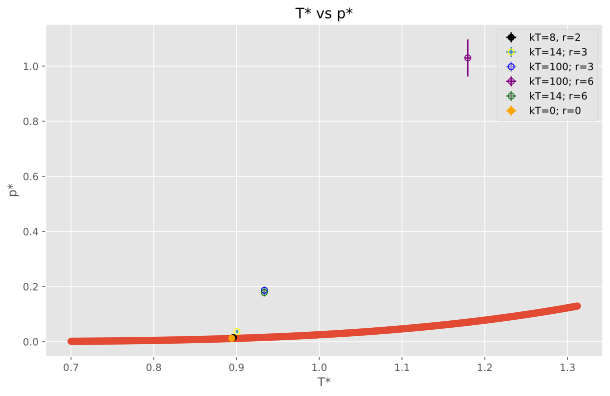

In [19]:
lines = data.strip().split('\n')
T_NIST_LJ = []
p_NIST_LJ = []
for line in lines:
    values = line.split()
    T_NIST_LJ.append(float(values[0]))
    p_NIST_LJ.append(float(values[3]))
    
T_NIST_LJ = np.array(T_NIST_LJ)
p_NIST_LJ = np.array(p_NIST_LJ)

plt.figure(figsize=(10, 6))
plt.plot(T_NIST_LJ, p_NIST_LJ, marker='o', linestyle='-')

plt.title('T* vs p*')
plt.xlabel('T*')
plt.ylabel('p*')
plt.grid(True)


plt.errorbar(temperature_longer_run_last_r2_T8, pressure_longer_run_last_r2_T8, xerr=temperature_r2_T8_std, yerr=pressure_r2_T8_std, label='kT=8, r=2', color='black', fmt='o', zorder=100)

plt.errorbar(temperature_longer_run_last_r3_T14, pressure_longer_run_last_r3_T14, yerr=pressure_r3_T14_std, xerr=temperature_r3_T14_std, label='kT=14; r=3', fmt='o', zorder=100, markerfacecolor='none', markeredgecolor='yellow')
plt.errorbar(temperature_longer_run_last_r3_T100, pressure_longer_run_last_r3_T100, yerr=pressure_r3_T100_std, xerr=temperature_r3_T100_std, label='kT=100; r=3', fmt='o', zorder=100,  markerfacecolor='none', markeredgecolor='blue')
plt.errorbar(temperature_longer_run_last_r6_T100, pressure_longer_run_last_r6_T100, yerr=pressure_r6_T100_std, xerr=temperature_r6_T100_std, label='kT=100; r=6', fmt='o', color='purple', zorder=100,  markerfacecolor='none', markeredgecolor='purple')
plt.errorbar(temperature_longer_run_last_r6_T14, pressure_longer_run_last_r6_T14, yerr=pressure_r6_T14_std, xerr=temperature_r6_T14_std, label='kT=14; r=6', fmt='o', zorder=100, markerfacecolor='none', markeredgecolor='green')

plt.errorbar(temperature_longer_run_last_normalize, pressure_longer_run_last_normalize, xerr=temperature_normalize_std, yerr=pressure_normalize_std, label='kT=0; r=0', color='orange', fmt='o', zorder=100)
plt.legend()
plt.show()